# Exercício01-Introdução a Inteligencia Computacional

### Pede-se aplicar o algoritmo LMS para os dados das tabelas abaixo. Para isso faça um programa de computador considerando o caso geral de dimensão D do vetor de entrada e N amostras de treinamento.Inclua o viés(bias) b como coeficientes(ou pesos) da regressão linear. Faça previsão para plotar curvas de aprendizagem(JvsK) e de evolução do valor dos pesos( w vs k).Considere dois casos:
### A) Modo Batelada B) Modo amostra por amostra

###### Aplique o programa acima para o caso:
##### a)
#### x = {-0.4,-0.2,-0.1,0.3,0.6,0.5,0.7}
#### d = {-1,1.5,2,3.2,3.5,5,2}

#### Calcule o coeficiente de correlação
#### Estime o valor de d para x=0 e x=1. Em qual d existe mais confiança? Justifique.

#### Para 
#### x1= {-0.5, -0.2,-0.1,0.3,0.4,0.6,0.7}
####  x2={3,3,2.5,2.5,-1,-1.5,-4}
#### d={-3,-1,0,1.2,1.8,3,4}
### Calcule a regressão linear aplicando o programa desenvolvido.

##### Para uma dimensão de x, primeira parte do ex:

### Forma analítica de regressão linear, interessante para comparar os resultados:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


coefficient of determination: 0.5506420599704182
intercept: 1.6678571428571423
slope: [3.23214286]
[[0]
 [1]
 [2]
 [3]
 [4]]
previsão: [[ 1.66785714]
 [ 4.9       ]
 [ 8.13214286]
 [11.36428571]
 [14.59642857]]


[-1, 2, 0, 10]

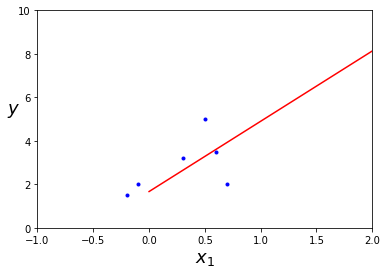

In [21]:
#Para vetor de uma dimensão
x = np.array([-0.4,-0.2,-0.1,0.3,0.6,0.5,0.7]).reshape((-1,1))
y= np.array([-1,1.5,2,3.2,3.5,5,2])
#y = np.reshape(y, (7, 1))
#X=np.reshape(X, (7,1))
model = LinearRegression().fit(x, y)
print('coefficient of determination:', model.score(x, y))
print('intercept:', model.intercept_)
print('slope:', model.coef_)

novo_x = np.arange(5).reshape((-1, 1)) # para testar os valores de x=0, e x=1
print(novo_x) 
previsao_y = model.intercept_ + model.coef_ * novo_x
print('previsão:', previsao_y)

plt.plot(novo_x,previsao_y,'r-')
plt.plot(x,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-1,2,0,10])

###### Coeficiente de determinação: mostra o quanto a variação em y pode ser explicada pela dependência em x. Quanto maior o coeficiente, maior a indicação de que o modelo se encaixou ou acertou (better fit) e significa que a variação do resultado pode ser explicada pelas diferentes entradas. Mais próximo de 1.0 também corresponde à soma dos erros ao quadrado ou Sum of Squared Residuals (SSR) mais próxima de 0 e um modelo perfeitamente inserido nos valores previstos, onde a resposta do previsto e do que realmente aconteceu é idêntica e sem erros.
###### Intercept ( theta0 ): mostra o ponto onde a regressão estimada cruza o eixo y quando x=0. Slope ( theta1 ): representa o quanto vai aumentar (ou diminuir) a resposta da predição quando  xi  aumentar 1.

#### Valor para x=0, possui mais confiança,pois seu resultado esperado está mais proximo da reta de regressão do que para x=1.

#### Vamos fazer agora  usando a regra de LMS ou regra de aprendizagem de Widrow Huff
#### Vamos considerar o método gradient descent

Para isso precisamos definir:
Valor de y seria minha hipotese, representado por J(THETA)
J(theta)= theta0 + theta1(X), onde theta0 = eixo que intercepta e theta1=peso
Definindo a função custo, gradiente e todos os gradientes para cada theta associado ao alpha- coefieciente de aprendizagem
em cada m observação.
A equação para calcular a função de custo e os gradientes são mostrados abaixo. Observe que a função de custo é para regressão linear. Para outros algoritmos, a função de custo será diferente e os gradientes teriam que ser derivados das funções de custo:

<b>Cost</b>
\begin{equation}
J(\theta) = 1/2m \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 
\end{equation}

<b>Gradient</b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
\end{equation}

<b>Gradients</b>
\begin{equation}
\theta_0: = \theta_0 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
\theta_1: = \theta_1 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_1^{(i)})
\end{equation}
\begin{equation}
\theta_2: = \theta_2 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_2^{(i)})
\end{equation}

\begin{equation}
\theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}


In [25]:
def  cal_cost(theta,x,y):    
    
    '''
   Vamos calcular a função custo dado X e Y, x vetor de dimensão 1,theta: como vetor de thetas
x =  np.zeros((7,j)) de colunas de x ; y =np.zeros((7,1)) de y, onde j é o numero de features
    '''

    m = len(y)
    predictions = x.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost


In [26]:
def gradient_descent(x,y,theta,learning_rate=0.01,iterations=100):
    '''
    x    = Matrix de x with unidades de viés ou bias adicionada
    y    = Vector de Y
    theta=Vector de thetas np.random.randn(j,1)
    learning_rate -coeficientente de aprendizagem 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(x,theta)
        
        theta = theta -(1/m)*learning_rate*( x.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,x,y)
        
    return theta, cost_history, theta_history
        
    
    

#### Vamos começar com 1000 iterações e uma taxa de aprendizado de 0,01

In [27]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          1.859,
Theta1:          2.423
Final cost/MSE:  36.004


In [28]:
#para x = 0
print(1*theta[0] + 0*theta[1])

#para x = 1
print(1*theta[0] + 1*theta[1])

[1.85872483]
[4.28197516]


#### Plotando a custo histórico em relação ao número de iterações

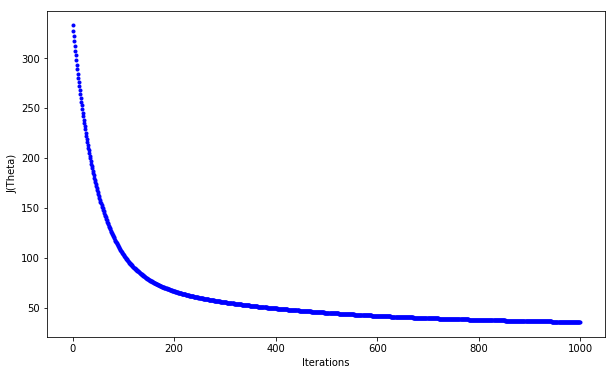

In [30]:
fig,ax = plt.subplots(figsize=(10,6))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

#### A partir de 200 iterações, o custo se estabiliza, e o restante de iterações não são mais necessárias, não resultando em mais otimizações, vamos então reduzir o número de iterações para 200.

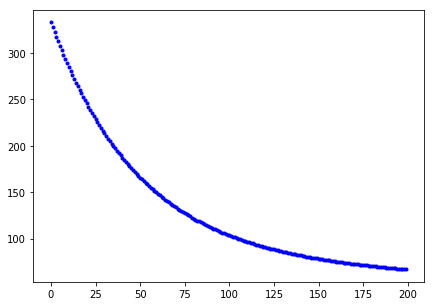

In [41]:
fig,ax = plt.subplots(figsize=(7,5))
_=ax.plot(range(200),cost_history[:200],'b.')

#### Vale a pena notar que o custo cai mais rapidamente inicialmente e, em seguida, o ganho na redução de custos não é tanto

#### Vamos notar o efeito de diferentes 'learning rate' com iterações  e observar o compartamento, para isso vamos criar uma função que mostre os efeitos dos dois parametros juntos e como gradient descent está se comportando:

In [38]:

def plot_GD(n_iter,lr,ax,ax1=None):
     """
     n_iter = no of iterations
     lr = Learning Rate
     ax = Eixo para plotar the Gradient Descent
     ax1 = Eixo para plotar cost_history vs Iterations plot

     """
     _ = ax.plot(X,y,'b.')
     theta = np.random.randn(2,1)

     tr =0.1
     cost_history = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')  

#### Plotando os gráficos combinando diferentes valores nos parametros de iteração e leraning rate:

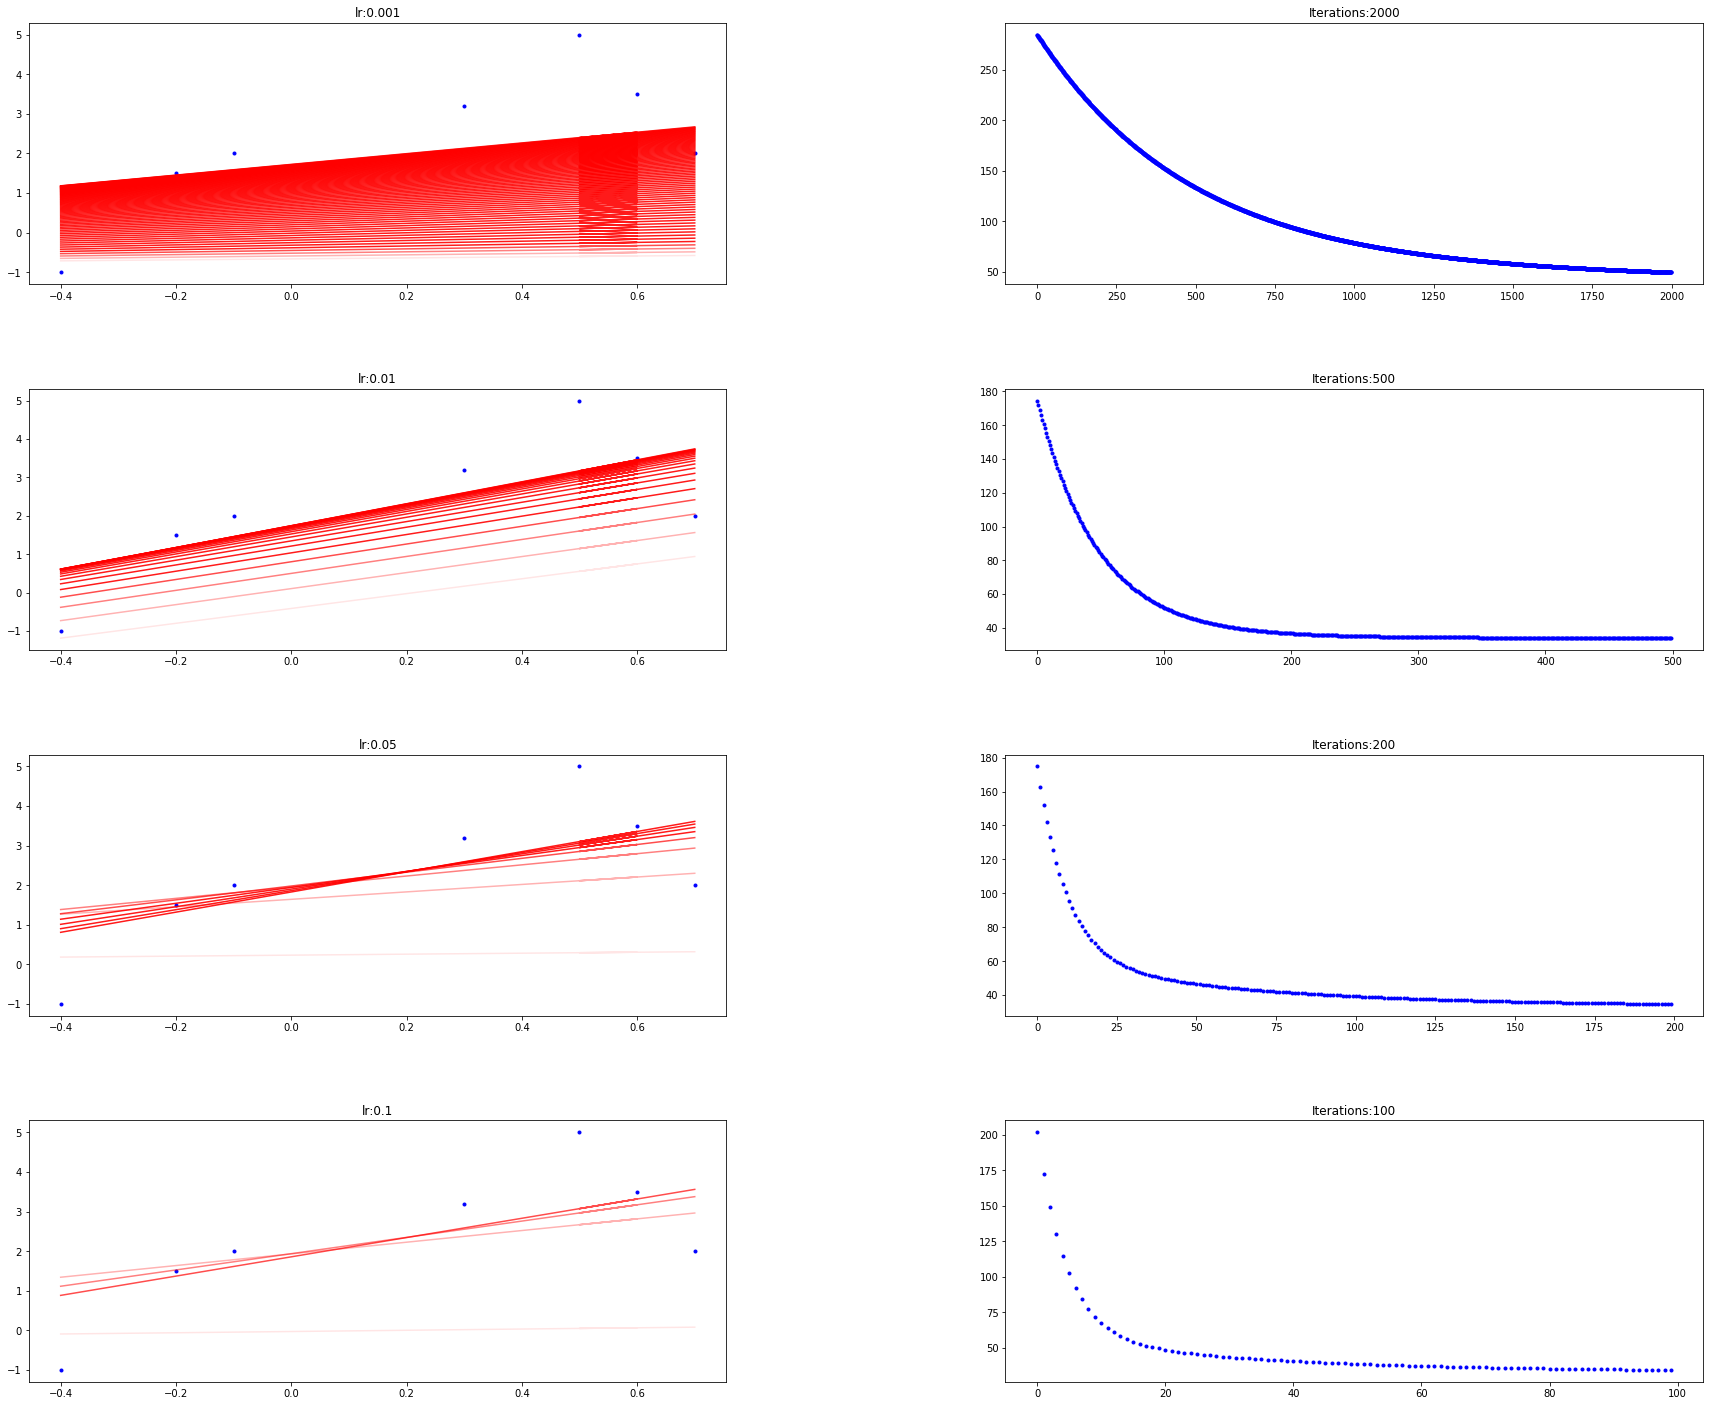

In [39]:
fig = plt.figure(figsize=(30,25))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)
    

#### Veja como é útil visualizar o efeito das taxas de aprendizado e iterações na descida do gradiente. As linhas vermelhas mostram como a descida do gradiente começa e depois se aproxima lentamente do valor final

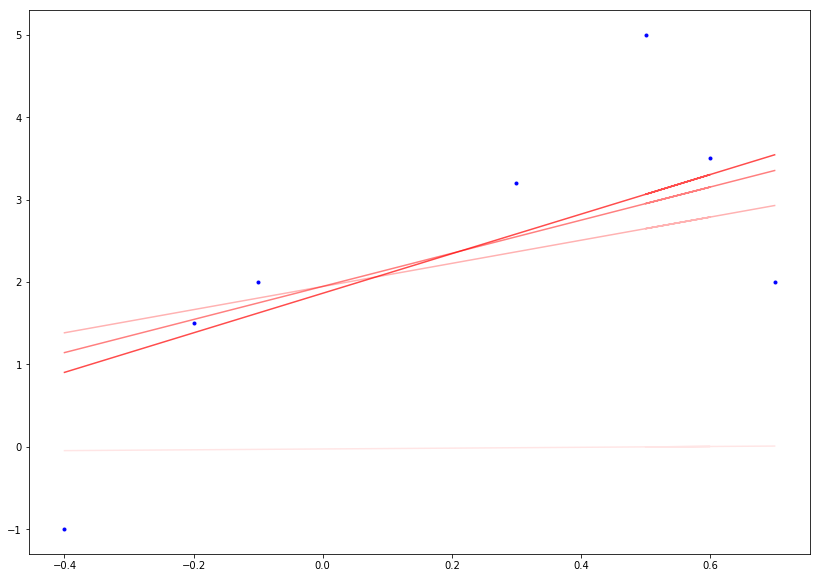

In [40]:
#vAMOS APROXIMAR MAIS O GRÁFICO PARA OBSERVAR O COMPORTAMENTO EM DETALHE
_,ax = plt.subplots(figsize=(14,10))
plot_GD(100,0.1,ax)

###  Vamos considerar primeiro o modo batelada(batch gradient descent)
#### Ele usa todo o lote de dados de treinamento em cada etapa. Ele calcula o erro para cada registro e leva uma média para determinar o gradiente. A vantagem do Batch Gradient Descent é que o algoritmo é mais eficiente em termos de computação e produz um caminho de aprendizado estável, facilitando a convergência. No entanto, a descida do gradiente em lote leva mais tempo quando o conjunto de treinamento é grande

In [24]:
X = np.array([-0.4,-0.2,-0.1,0.3,0.6,0.5,0.7])
y= np.array([-1,1.5,2,3.2,3.5,5,2])
y = np.reshape(y, (7, 1))
X=np.reshape(X, (7,1))


In [14]:
def batch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [16]:
lr =0.1
n_iter = 200

theta = np.random.randn(2,1)


theta,cost_history = batch_gradient_descent(X,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          1.711,
Theta1:          3.049
Final cost/MSE:  33.551


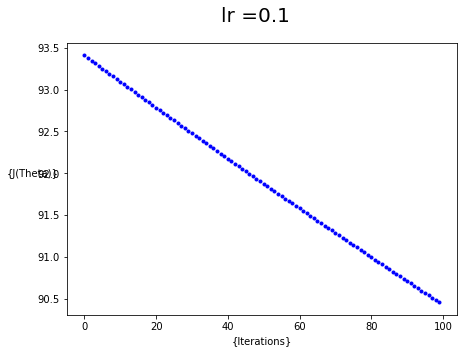

In [44]:
fig,ax = plt.subplots(figsize=(7,5))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)
fig.suptitle('lr =0.1', fontsize=20)

_=ax.plot(range(n_iter),cost_history,'b.')

###### Para os valores x=0 e x=1 os valores de y são:

In [19]:
#para x = 0
print(1*theta[0] + 0*theta[1])

#para x = 1
print(1*theta[0] + 1*theta[1])

[1.71108]
[4.76012788]


O valor mais confiável seria para x=1, pois estará mais próxima da tendencia que a reta a segue na regressão linear.

### Mudando os valores do coeficiente de aprendizagem e o numero de iterações.

Theta0:          1.668,
Theta1:          3.232
Final cost/MSE:  33.419
Theta0:          -0.877,
Theta1:          -1.293
Final cost/MSE:  405.297


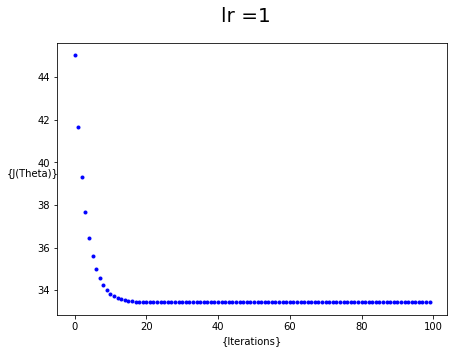

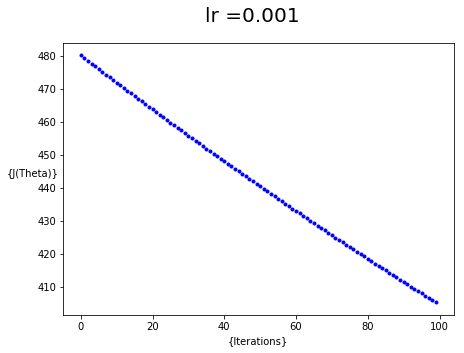

In [45]:
lr = 1
n_iter = 100

theta = np.random.randn(2,1)


theta,cost_history = batch_gradient_descent(X,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

fig,ax = plt.subplots(figsize=(7,5))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
fig.suptitle('lr =1', fontsize=20)
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

lr = 0.001
n_iter = 100

theta = np.random.randn(2,1)


theta,cost_history = batch_gradient_descent(X,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

fig,ax = plt.subplots(figsize=(7,5))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
fig.suptitle('lr =0.001', fontsize=20)
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

### Vamos considerar o segundo modo: amostra por amostra ou Stochastic Gradient Descent


#### Apenas seleciona uma instância do conjunto de treinamento a cada etapa e atualiza o gradiente apenas com base nesse único registro. A vantagem da descida estocástica do gradiente é que o algoritmo é muito mais rápido a cada iteração, o que corrige a limitação na descida do gradiente em batelada. No entanto, o algoritmo produz um caminho de aprendizado menos regular e estável em comparação com a descida do gradiente em batelada. Em vez de diminuir sem problemas, a função de custo será revertida para cima e para baixo. Após rodadas de iterações, o algoritmo pode encontrar um bom parâmetro, mas o resultado final não é o ideal global ideal.

In [46]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

Theta0:          1.908,
Theta1:          -1.015
Final cost/MSE:  3.685
Theta0:          0.259,
Theta1:          0.160
Final cost/MSE:  6.835
Theta0:          -0.212,
Theta1:          -0.142
Final cost/MSE:  15.910


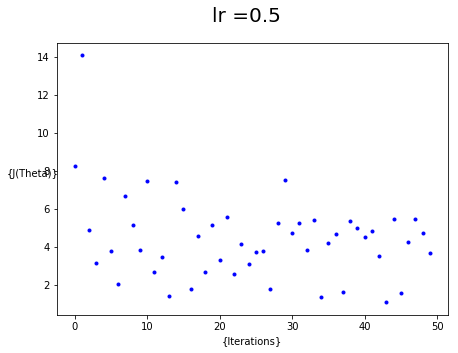

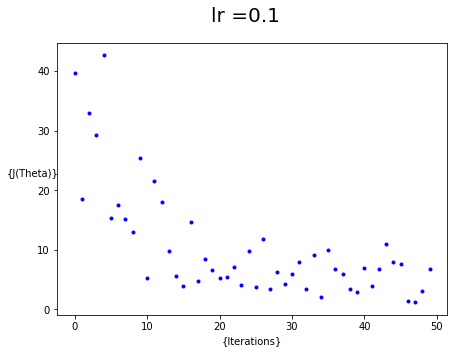

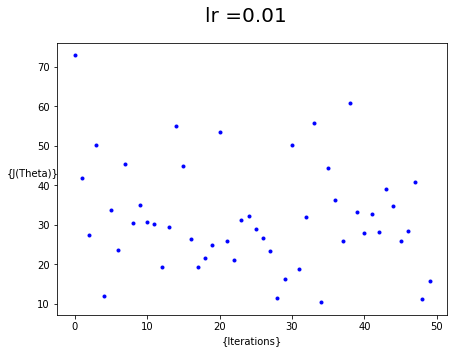

In [52]:
lr =0.5
n_iter = 50

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)

fig,ax = plt.subplots(figsize=(7,5))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
fig.suptitle('lr =0.5', fontsize=20)
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

lr =0.1
n_iter = 50

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)

fig,ax = plt.subplots(figsize=(7,5))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
fig.suptitle('lr =0.1', fontsize=20)
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

lr =0.01
n_iter = 50

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)

fig,ax = plt.subplots(figsize=(7,5))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
fig.suptitle('lr =0.01', fontsize=20)
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

In [53]:
#para x = 0
print(1*theta[0] + 0*theta[1])

#para x = 1
print(1*theta[0] + 1*theta[1])

[-0.21174745]
[-0.35416718]


### EXERCÍCIO 3.
#### Regressão Linear para: x1= {-0.5, -0.2,-0.1,0.3,0.4,0.6,0.7}
#### x2={3,3,2.5,2.5,-1,-1.5,-4}
#### d={-3,-1,0,1.2,1.8,3,4}


In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
x = np.array(([-0.5, 3.0], [-0.2, 3.0], [-0.1, 2.5], [0.3, 2.5], [0.4,-1.0], [0.6,-1.5], [0.7,-4.0 ]))
y = np.array([-3, -1, 0, 1.2, 1.8, 3, 4]).reshape((-1,1))
model = LinearRegression().fit(x, y)
print('coefficient of determination:', model.score(x, y))
print('intercept:', model.intercept_)
print('slope:', model.coef_)


coefficient of determination: 0.9793690743885075
intercept: [0.04422238]
slope: [[ 4.97768084 -0.06283859]]


[-1, 2, 0, 10]

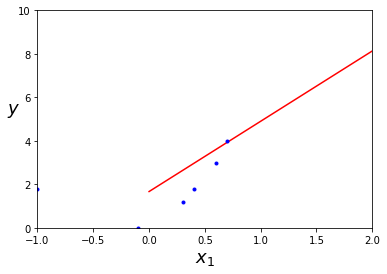

In [45]:
plt.plot(novo_x,previsao_y,'r-')
plt.plot(x,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-1,2,0,10])